In [21]:
import tensorflow as tf

In [22]:
device_list=tf.test.gpu_device_name()

In [23]:
device_list

'/device:GPU:0'

In [24]:
if device_list != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:{}'.format(device_list))

Found GPU at:/device:GPU:0


In [1]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 992.4 kB/s eta 0:00:00


In [17]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive/')




Mounted at /content/drive/


In [8]:
TRAIN_DIR = '/content/drive/MyDrive/Face emotion dataset/images/train'
TEST_DIR = '/content/drive/MyDrive/Face emotion dataset/images/test'

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [6]:
!pip install pandas

In [21]:
import os
os.chdir("/content/drive/My Drive")
!ls

'3-2 (Final)Tasks'
 Audify_IMG_0.png
 BDURC
'bg remove rc'
 Classroom
'Colab Notebooks'
'contest list.gsheet'
'Copy of Computer Security for Kids by Slidesgo .gslides'
'Copy of MLWBD.com Into The Wild (2007) 480p BluRay x264 Dual Audio {Hindi DD 2.0 + English DD 2.0} ESubs 561.7 M .mkv'
'demo class1.mp4'
'demo class.mp4'
'Demo class.mp4'
'Face emotion dataset'
'Google UX Design Certificate - Identify Good UX Design [Template].gdoc'
 Ictob
 IDCards.pdf
 IMG-20200805-WA0041.jpg
 inbound894597930740582607.jpg
'Mumtahin Ahmed Shoshi.png'
 Net_problem_GH-2
 Nishat_Tasnim_Shishir.jpeg
 Papers
'Part -02  Id -1901026.pdf'
 payment_bill.java
 Picture
'Presentation Iot by sayor.pptx'
'Project Papers'
'Real Life App lab'
 received_808143800510728.jpeg
'sw project'
'To-do list (1).gsheet'
'To-do list.gsheet'
'To Do list.gsheet'
'Untitled presentation.gslides'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet.gsheet'
 Wifi_problem_GH_2
'zho-vjib-tnj – 17 Feb 2023.gjam'
'" পরাণের গহীন ভিতর ".a

In [9]:
import pandas as pd
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
fear completed
disgust completed
surprise completed
happy completed
sad completed
neutral completed


In [10]:
print(train)

                                                   image    label
0      /content/drive/MyDrive/Face emotion dataset/im...    angry
1      /content/drive/MyDrive/Face emotion dataset/im...    angry
2      /content/drive/MyDrive/Face emotion dataset/im...    angry
3      /content/drive/MyDrive/Face emotion dataset/im...    angry
4      /content/drive/MyDrive/Face emotion dataset/im...    angry
...                                                  ...      ...
28816  /content/drive/MyDrive/Face emotion dataset/im...  neutral
28817  /content/drive/MyDrive/Face emotion dataset/im...  neutral
28818  /content/drive/MyDrive/Face emotion dataset/im...  neutral
28819  /content/drive/MyDrive/Face emotion dataset/im...  neutral
28820  /content/drive/MyDrive/Face emotion dataset/im...  neutral

[28821 rows x 2 columns]


In [12]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
surprise completed
neutral completed
fear completed
sad completed
happy completed
disgust completed


In [13]:
print(test)
print(test['image'])

                                                  image    label
0     /content/drive/MyDrive/Face emotion dataset/im...    angry
1     /content/drive/MyDrive/Face emotion dataset/im...    angry
2     /content/drive/MyDrive/Face emotion dataset/im...    angry
3     /content/drive/MyDrive/Face emotion dataset/im...    angry
4     /content/drive/MyDrive/Face emotion dataset/im...    angry
...                                                 ...      ...
7071  /content/drive/MyDrive/Face emotion dataset/im...  disgust
7072  /content/drive/MyDrive/Face emotion dataset/im...  disgust
7073  /content/drive/MyDrive/Face emotion dataset/im...  disgust
7074  /content/drive/MyDrive/Face emotion dataset/im...  disgust
7075  /content/drive/MyDrive/Face emotion dataset/im...  disgust

[7076 rows x 2 columns]
0       /content/drive/MyDrive/Face emotion dataset/im...
1       /content/drive/MyDrive/Face emotion dataset/im...
2       /content/drive/MyDrive/Face emotion dataset/im...
3       /content/driv

In [14]:
from tqdm.notebook import tqdm

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [20]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [25]:
test_features = extract_features(test['image'])

  0%|          | 0/7076 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [26]:
x_train = train_features/255.0
x_test = test_features/255.0

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [31]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [32]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [34]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [35]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [36]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 28s 60ms/step - loss: 1.8234 - accuracy: 0.2442 - val_loss: 1.8124 - val_accuracy: 0.2579
Epoch 2/100
226/226 [==============================] - 13s 57ms/step - loss: 1.8064 - accuracy: 0.2528 - val_loss: 1.7750 - val_accuracy: 0.2655
Epoch 3/100
226/226 [==============================] - 13s 58ms/step - loss: 1.7330 - accuracy: 0.2851 - val_loss: 1.6474 - val_accuracy: 0.3423
Epoch 4/100
226/226 [==============================] - 13s 56ms/step - loss: 1.6145 - accuracy: 0.3589 - val_loss: 1.4921 - val_accuracy: 0.4233
Epoch 5/100
226/226 [==============================] - 13s 57ms/step - loss: 1.5077 - accuracy: 0.4128 - val_loss: 1.3817 - val_accuracy: 0.4672
Epoch 6/100
226/226 [==============================] - 13s 59ms/step - loss: 1.4434 - accuracy: 0.4391 - val_loss: 1.3227 - val_accuracy: 0.4990
Epoch 7/100
226/226 [==============================] - 13s 57ms/step - loss: 1.4020 - accuracy: 0.4588 - val_loss: 1.2898 - val_ac

In [38]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [39]:
from keras.models import model_from_json

In [40]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [41]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [42]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [44]:
image = '/content/drive/MyDrive/Face emotion dataset/images/train/neutral/47.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of neutral
1/1 [==============================] - 0s 18ms/step
model prediction is  neutral


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 27ms/step
model prediction is  sad


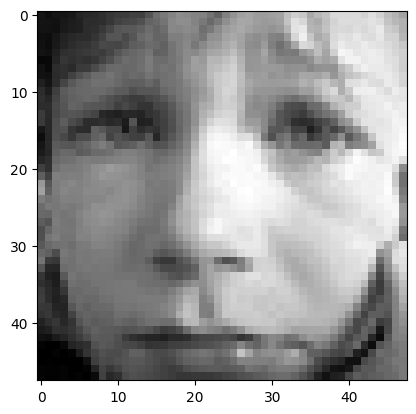

In [58]:
image = '/content/drive/MyDrive/Face emotion dataset/images/train/sad/6.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 20ms/step
model prediction is  fear


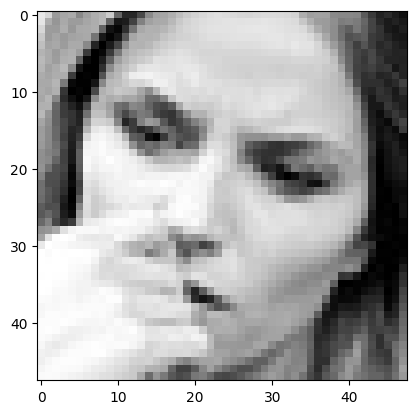

In [47]:
image = '/content/drive/MyDrive/Face emotion dataset/images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 18ms/step
model prediction is  disgust


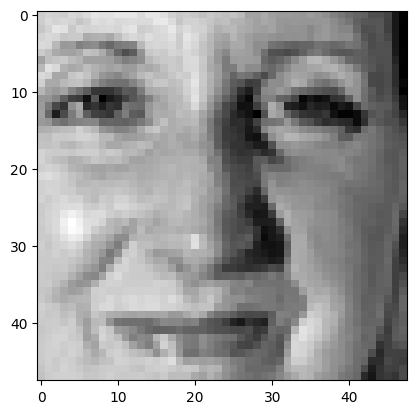

In [57]:
image = '/content/drive/MyDrive/Face emotion dataset/images/train/disgust/1310.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 19ms/step
model prediction is  happy


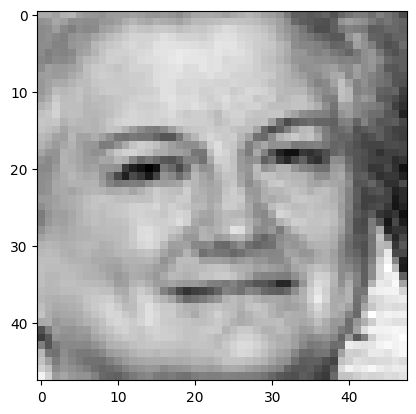

In [59]:
image = '/content/drive/MyDrive/Face emotion dataset/images/train/happy/100.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 19ms/step
model prediction is  surprise


/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


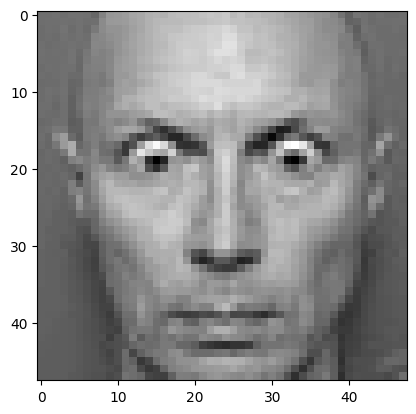

In [64]:
image = '/content/drive/MyDrive/Face emotion dataset/images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')